# Online Retail

This is a 2009 dataset from UCI. The dates in the dataset range from 2009-11. 
link to the dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II 
We are going to perform some exploratory analysis on the data first and then build a clustering model to group similar customers together and a recommendation engine.
First part will be exploratory analysis to get some good data visualizations.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import plotly.express as px

## Step 1: Download and explore the data

In [3]:
DATA_FILENAME = "C:/Users/mukun/python nbs/online_retail_II.xlsx"

Reading the Dataset using Pandas Read Excel file. The dataset has two seasons: 2009-10 and 2010-11 
which are in separate sheets.

In [100]:
df_09 = pd.read_excel(DATA_FILENAME,dtype={'CustomerID': str,
                          'InvoiceID': str},sheet_name='Year 2009-2010',date_parser=['InvoiceDate'])
df_10 = pd.read_excel(DATA_FILENAME,dtype={'CustomerID': str,
                          'InvoiceID': str},sheet_name='Year 2010-2011',date_parser=['InvoiceDate'])
dataframe=df_09.append(df_10)
dataframe.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [101]:
dataframe=df_09

In [102]:
dataframe=dataframe[dataframe['Country']=='United Kingdom']

In [103]:
# Transforming the date columns for performing granular analysis by time so that we can observe trends in the data
from datetime import datetime


dataframe['InvDt']=pd.DatetimeIndex(dataframe['InvoiceDate']).date
dataframe['Inv_Hr']=pd.DatetimeIndex(dataframe['InvoiceDate']).hour
dataframe['Inv_Year']=pd.DatetimeIndex(dataframe['InvoiceDate']).year
dataframe['Inv_Month']=pd.DatetimeIndex(dataframe['InvoiceDate']).month
dataframe['Inv_Day']=pd.DatetimeIndex(dataframe['InvoiceDate']).day
dataframe['Inv_Week']=pd.to_datetime(dataframe['InvoiceDate']).dt.isocalendar().week
dataframe['TotalPrice']=dataframe['Quantity']*dataframe['Price']
dataframe['year-month']=dataframe['Inv_Year'].astype(str)+"-"+dataframe['Inv_Month'].astype(str)

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [106]:
# Look for missing values in the customer id field
dataframe.dropna(subset=['Customer ID'], inplace=True)


C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
dataframe['order_month'] = dataframe['InvoiceDate'].dt.to_period('M')

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
dataframe['cohort_month'] = dataframe.groupby('Customer ID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.month
dataframe['cohort_year'] = dataframe.groupby('Customer ID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.year
dataframe['Month']=dataframe['cohort_year'].astype(str)+"-"+dataframe['cohort_month'].astype(str)

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mukun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [112]:
df = dataframe[['Customer ID', 'Invoice', 'InvoiceDate']].drop_duplicates()
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort_month'] = df.groupby('Customer ID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.month
df['cohort_year'] = df.groupby('Customer ID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.year

nca=pd.pivot_table(df,index = ['cohort_year','cohort_month'],values = 'Customer ID',aggfunc=lambda x: len(x.unique())).reset_index()
nca.rename(columns={'Customer ID':'New Customers Added'},inplace=True)
nca['Month']=nca['cohort_year'].astype(str)+"-"+nca['cohort_month'].astype(str)
px.line(nca,'Month','New Customers Added')

In [113]:
df12=pd.pivot_table(dataframe,index=['Customer ID','Month'],values='TotalPrice',aggfunc='mean',fill_value=0)

df13=df12.reset_index()
df13.rename(columns={'TotalPrice':'Avg Order Value Per Customer'},inplace=True)
df14=pd.pivot_table(df13,index=['Month'],values='Avg Order Value Per Customer',aggfunc='mean',fill_value=0).reset_index()
px.bar(df14,'Month','Avg Order Value Per Customer')

In [91]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('Customer ID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [92]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('Customer ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [93]:
cohort_pivot1 = df_cohort.pivot_table(index = 'cohort',
                                     values = 'n_customers',aggfunc='sum')
cohort_pivot1.reset_index()

,cohort,n_customers
0,2009-12,5460
1,2010-01,1400
2,2010-02,1146
3,2010-03,1262
4,2010-04,690
5,2010-05,544
6,2010-06,547
7,2010-07,336
8,2010-08,287
9,2010-09,369


In [96]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
#cohort_pivot.drop([cohort_pivot.index[12]],inplace=True)

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

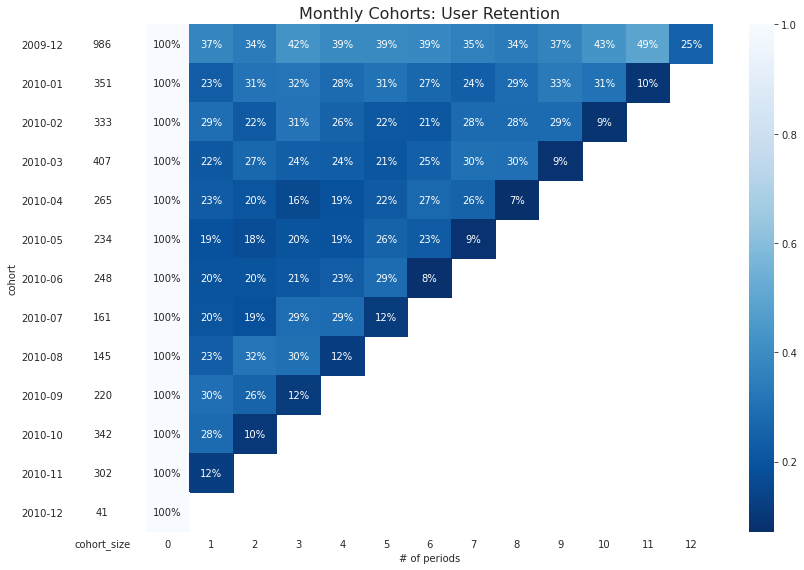

In [97]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='Blues_r', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()
    fig.savefig('line_plot.png') 

In [9]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Summary of the dataset
dataframe.describe()

,Quantity,Price,Customer ID,cohort_month,cohort_year,Inv_Hr,Inv_Year,Inv_Month,Inv_Day,Inv_Week,TotalPrice
count,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478,8.191845,2009.517414,12.882400,2009.923934,7.399716,15.362646,30.004754,19.994081
std,101.220424,71.131797,1680.811316,4.353483,0.499697,2.316916,0.265103,3.474624,8.731243,15.053090,99.915863
min,-9360.000000,0.000000,12346.000000,1.000000,2009.000000,7.000000,2009.000000,1.000000,1.000000,1.000000,-25111.090000
25%,2.000000,1.250000,13983.000000,3.000000,2009.000000,11.000000,2010.000000,4.000000,8.000000,17.000000,4.250000
50%,4.000000,1.950000,15311.000000,11.000000,2010.000000,13.000000,2010.000000,8.000000,15.000000,32.000000,11.250000
75%,12.000000,3.750000,16799.000000,12.000000,2010.000000,14.000000,2010.000000,11.000000,23.000000,44.000000,19.350000
max,19152.000000,25111.090000,18287.000000,12.000000,2010.000000,21.000000,2010.000000,12.000000,31.000000,52.000000,15818.400000


In [98]:
#creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = dataframe.groupby('year-month')['Customer ID'].nunique().reset_index()
monthly_active.rename(columns={'Customer ID':'Active Customers','year-month':'Month'},inplace=True)
monthly_active.drop([monthly_active.index[4]],inplace=True)
px.bar(monthly_active,x="Month",y="Active Customers",title='Monthly Active Customers',text_auto=True)